In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))
import torch
import numpy as np
import utils
import matplotlib.pyplot as plt
from dataset import DataSet
import pandas as pd
import glob
%load_ext autoreload
np.random.seed(2) 
torch.manual_seed(2)

In [2]:
data_folders = ['ZTF_Mrk817',
                'ZTF_NGC5548',
                'ZTF_rm_segs/Mrk142/X/ZTF_epoch3_',
                'ZTF_rm_segs/Mrk817/X/ZTF_epoch2_',
                'ZTF_Mrk142',
                'ZTF_3C273', 
                'ZTF_rm_segs/Mrk817/X/ZTF_epoch0_',
                'ZTF_MCG+08-11-011']

data_folders = [f'../../datasets/{df}' for df in data_folders]
data_folders


['../../datasets/ZTF_Mrk817',
 '../../datasets/ZTF_NGC5548',
 '../../datasets/ZTF_rm_segs/Mrk142/X/ZTF_epoch3_',
 '../../datasets/ZTF_rm_segs/Mrk817/X/ZTF_epoch2_',
 '../../datasets/ZTF_Mrk142',
 '../../datasets/ZTF_3C273',
 '../../datasets/ZTF_rm_segs/Mrk817/X/ZTF_epoch0_',
 '../../datasets/ZTF_MCG+08-11-011']

In [3]:
glob.glob('../intrps/*')

['../intrps/Mrk817',
 '../intrps/NGC5548',
 '../intrps/Mrk142seg3',
 '../intrps/Mrk817seg2',
 '../intrps/Mrk142',
 '../intrps/3C273',
 '../intrps/Mrk817seg0',
 '../intrps/MCG+08-11-011']

found 1 for band='r'
found 1 for band='i'
found 1 for band='g'
max time:  59791.184
created union_tp attribute of length 3500
dataset created, lcs.dataset.shape=(1, 3, 1924, 3)
train size: 0, valid size: 0, test size: 1
['../intrps/Mrk817/ZTF_Mrk817-1.1086530685424805_g.dat', '../intrps/Mrk817/ZTF_Mrk817-1.1086530685424805_i.dat', '../intrps/Mrk817/ZTF_Mrk817-1.1086530685424805_r.dat']
0
58198.37109375
2
58198.37109375
1
58198.37109375


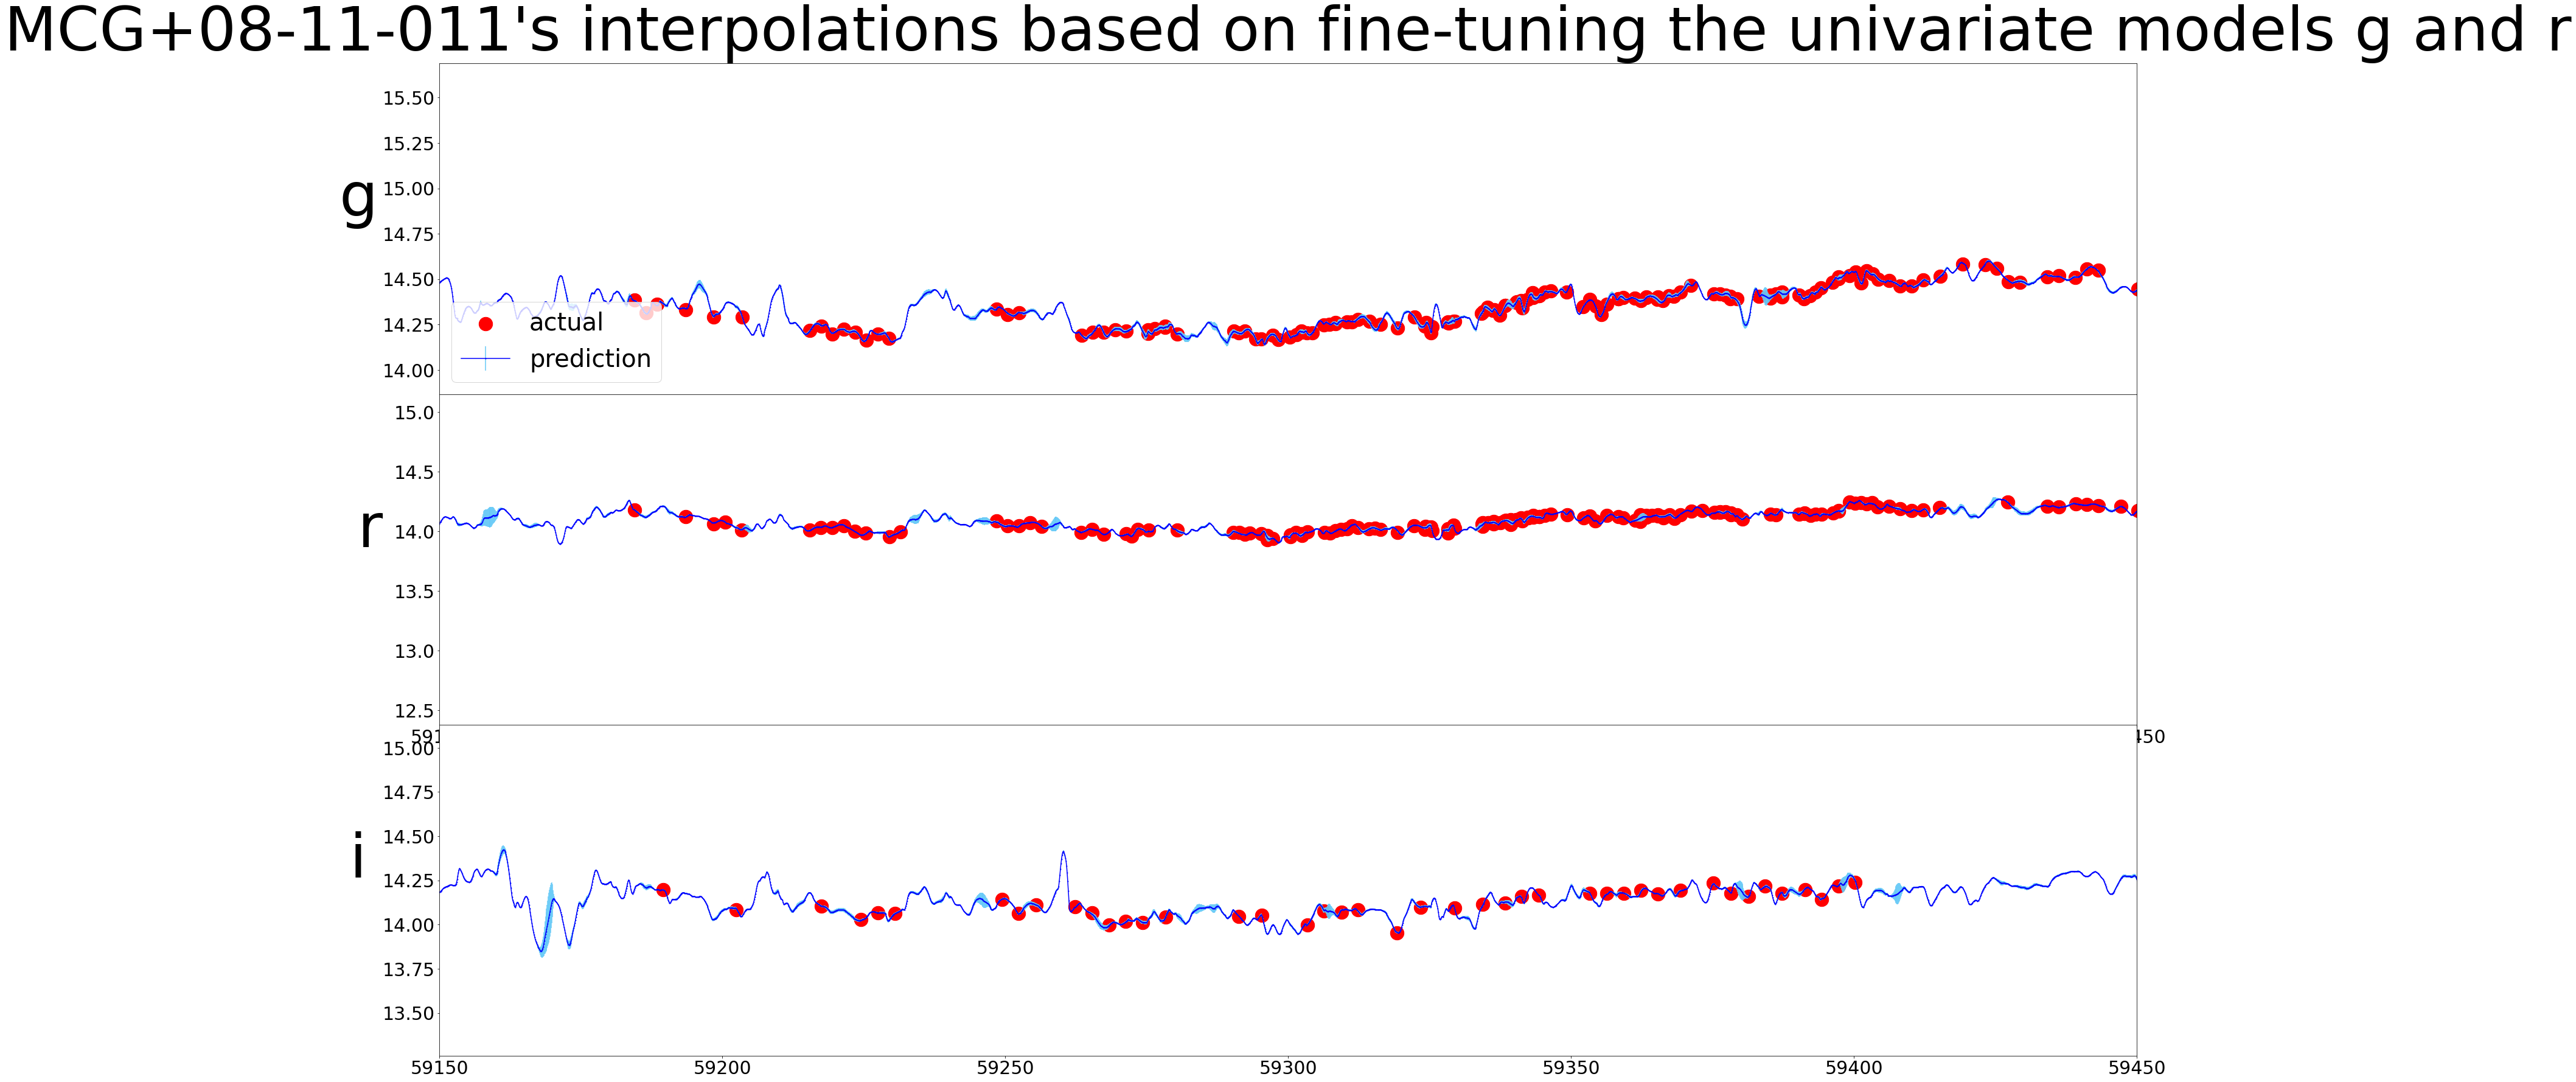

In [34]:
order = [0,2,1] ## order of intrps/obj/lcs_g .. 
order2 = [2,0,1] ## order in lcs.datset
# order=[0,1]
# order = [0]
# order2 = [0]
figsize=(20,15)
plt.rcParams['xtick.labelsize']=30
plt.rcParams['ytick.labelsize']=30
fig,ax = plt.subplots(3,figsize=(50,30))
for i, obj in enumerate(glob.glob('../intrps/*')):
    if i == 0:
        if data_folders[i].find('seg') > 0: 
            lcs = utils.get_data(data_folders[i],sep=' ',start_col=0, shuffle=False,norm=False, num_resamples=0,min_length=0)
        else:
            lcs = utils.get_data(data_folders[i],shuffle=False,norm=False, num_resamples=0,min_length=0)
        
        intrp_files = glob.glob(obj+'/*') # +'/gri_finet/*'
        intrp_files.sort()
        print(intrp_files)
        intrps = [np.loadtxt(lc) for lc in intrp_files]

        for j in range(3):
            print(order[j])
            t = intrps[order[j]][:,0]
            print(np.min(t))
            y = intrps[order[j]][:,1]
            yerr = intrps[order[j]][:,2]
#             ax[j].set_xlim(58750,59000)

#             ax[j].fill_between(t,y-yerr,y+yerr, label='error envelope',color='lightcoral')
            ax[j].errorbar(t,y,yerr=yerr, c='blue', ecolor='#65c9f7', label='prediction',marker='o',markersize=1)
            ax[j].set_xlim(59150,59450)
            ax[j].set_ylabel(lcs.bands[order2[j]],fontsize=100,rotation=0,labelpad=40)
            i_s = lcs.dataset[0,order2[j],:,1].nonzero()
            ax[j].scatter(lcs.dataset[0,order2[j],i_s,0],lcs.dataset[0,order2[j],i_s,1],marker='o',color='r',s=500,label='actual')
        ax[0].legend(fontsize=40,loc='lower left')
        ax[0].set_title("MCG+08-11-011's interpolations based on fine-tuning the univariate models g and r",fontsize=100)
        ax[0].set_xticks([])
plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('../img/intrps/MCG_g,r_finet.pdf')
       ## make points bigger 
    

In [47]:
files = glob.glob('../intrps/MCG+08-11-011/gri/*')

['../intrps/MCG+08-11-011/gri/ZTF_gri0.8933992385864258_g.dat',
 '../intrps/MCG+08-11-011/gri/ZTF_gri0.8933992385864258_r.dat']